#### Load the dataset

In [1]:
import pandas as pd
test = pd.read_csv('test.csv')
train = pd.read_csv('training.csv')
valid = pd.read_csv('validation.csv')



## Data exploration
#### store the test, train and validation data as a list

In [2]:
data = [test, train, valid]



for i in data:
    print (i.shape)
    print(i.sample(5))
    print(i.head())

(2000, 2)
                                                   text  label
1524  i look at this photo i feel gentle and calm my...      2
558   i write this i feel oddly calm like wanting to...      1
1074  i feel that sometimes i ve been distracted and...      3
314   i will nolonger tell anybody how i feel or wha...      0
367   i think it s the opposite i get to feel defeat...      0
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0
(16000, 2)
                                                    text  label
8178   i admit to feeling slightly alarmed that her b...      4
2434   i feel irritable and unfulfilled if i dont pai...      3
4575   when my elders do not understand me in the

tweet id column serves no function, so i drop it

### Chcek the numbers of the dataset


In [3]:
for i in data:
    print(i['label'].value_counts().sum())

2000
16000
2000


###### test  and validation are both 2000 
###### training data is 16000

#### Visualization of the results

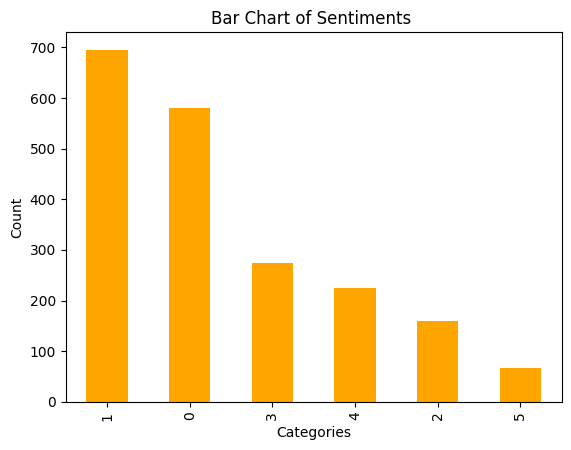

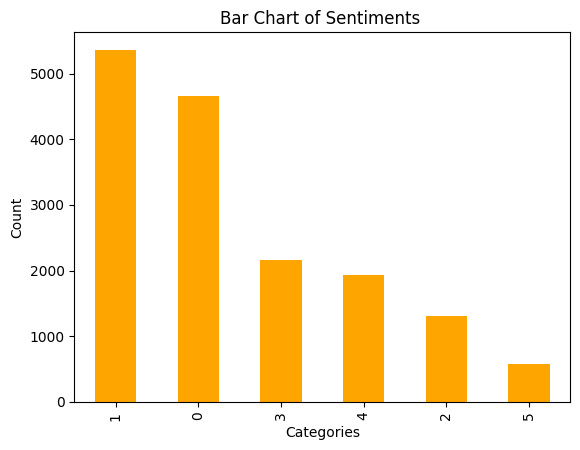

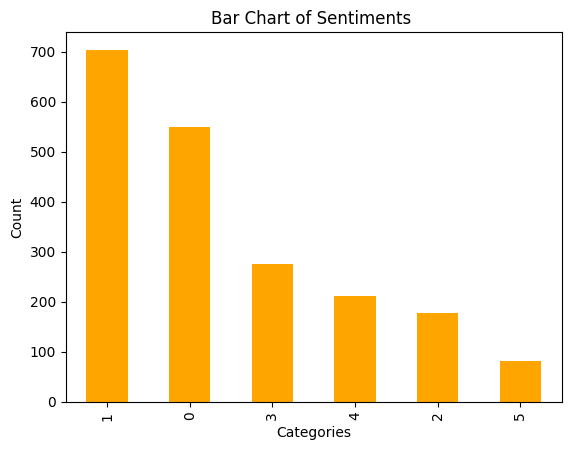

In [25]:
import matplotlib.pyplot as plt
for i in data:
    i['label'].value_counts().plot(kind='bar', color='orange')
    plt.title('Bar Chart of Sentiments ')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.show()


In [26]:
for i in data:
        print(i['label'].isnull().sum())
        
        i['text'].isnull().sum()



0
0
0


#### Convert text to lowercase, remove stopwords, punctuation, numbers, and unnecessary whitespace


In [27]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))  
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
for i in data:
    
    i['text'] = i['text'].apply(clean_text)


In [28]:
for i in data:
 for column in i:
    print(column)
    print(f'{column}:{i[column].unique()}')

text
text:['im feeling rather rotten im ambitious right'
 'im updating blog feel shitty'
 'never make separate ever want feel like ashamed' ...
 'feel useful people gives great feeling achievement'
 'im feeling comfortable derby feel though start step shell'
 'feel weird meet w people text like dont talk face face w']
label
label:[0 1 4 3 2 5]
text
text:['didnt feel humiliated'
 'go feeling hopeless damned hopeful around someone cares awake'
 'im grabbing minute post feel greedy wrong' ...
 'feel strong good overall' 'feel like rude comment im glad'
 'know lot feel stupid portray']
label
label:[0 3 2 5 4 1]
text
text:['im feeling quite sad sorry ill snap soon'
 'feel like still looking blank canvas blank pieces paper'
 'feel like faithful servant' ...
 'feel important share info experience thing'
 'truly feel passionate enough something stay true succeed'
 'feel like wan na buy cute make see online even one']
label
label:[0 2 3 1 4 5]



### Sentiments and values the represent
##### Sadness = 0
##### Joy = 1
##### Love = 2
##### Anger = 3
##### Fear = 4

### Data Splitting and model Etraining and evaluation

In [29]:
x_test = test['text']
y_test = test['label']


In [30]:
x_train = test['text']
y_train = test['label']

In [31]:
x_valid = test['text']
y_valid = test['label']

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer



vectorizer = CountVectorizer()
x_train_tv = vectorizer.fit_transform(x_train)

x_test_tv = vectorizer.transform(x_test)
x_valid_tv = vectorizer.transform(x_valid)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [34]:
clf = LogisticRegression(solver="lbfgs",max_iter=200)

In [35]:
clf.fit(x_train_tv,y_train)


LogisticRegression(max_iter=200)

In [36]:
y_test_pred = clf.predict(x_test_tv)


In [37]:
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       581
           1       0.98      1.00      0.99       695
           2       1.00      0.95      0.97       159
           3       1.00      1.00      1.00       275
           4       0.99      0.99      0.99       224
           5       1.00      0.94      0.97        66

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [38]:
y_valid_pred = clf.predict(x_valid_tv)


In [39]:
print(classification_report(y_valid,y_valid_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       581
           1       0.98      1.00      0.99       695
           2       1.00      0.95      0.97       159
           3       1.00      1.00      1.00       275
           4       0.99      0.99      0.99       224
           5       1.00      0.94      0.97        66

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [40]:
import pickle
pickle.dump(clf, open('emotion.pkl','wb'))

In [41]:
pickle.dump(vectorizer, open("vectorizer.pkl","wb"))


In [42]:
clf = pickle.load(open("emotion.pkl","rb"))
